In [1]:
import os
import uproot
import ROOT
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 3)

def get_tgrapherrors_values(g):
    n = g.GetN()
    x, y = [], []
    for i in range(n):
        x.append(g.GetPointX(i))
        y.append(g.GetPointY(i))
    return x, y

Welcome to JupyROOT 6.24/09


In [2]:
# o stands for "old"
ofname = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/CProfiles/old_tools/CProf_11_fit.root") # from writecprof.cc
fname  = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/CProfiles/cprofiles_fits.root")

of = uproot.open(ofname)
f  = uproot.open(fname)

for key in of.keys(): print(key)

hprofinf;1
gNphot;1
gsthr;1
gNphot_pars;1
gsthr_pars;1
gI_iso_1;1
hI_iso_1;1
gI_iso_1_pars;1
gI_iso_2;1
hI_iso_2;1
gI_iso_2_pars;1
hI3d_nsect_0;1
hI3d_par_0;1
hI3d_nsect_1;1
hI3d_par_1;1
hI3d_nsect_2;1
hI3d_par_2;1


In [3]:
n = 0
# get fit parameters
ojs, or0bins, oth0bins, ojbins = of[f"hI3d_par_{n}"].to_numpy()
js ,  r0bins,  th0bins,  jbins =  f[f"hI3d_par_{n}"].to_numpy()

np.testing.assert_allclose(or0bins, r0bins)

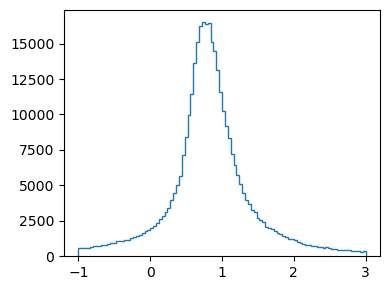

In [17]:
plt.figure()

qs = (js[:, :, :5]/ojs[:, :, :5]).flatten()
sel = (-1<qs) & (qs<3)
plt.hist(qs[sel], bins=100, histtype="step")

plt.tight_layout()

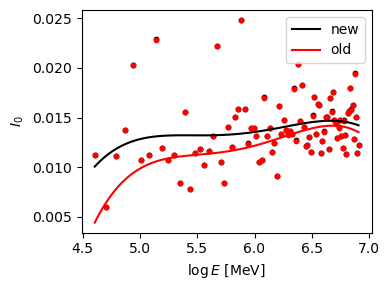

In [7]:
r0bin  = 5
th0bin = 10

# get integrals
fin = ROOT.TFile("$HOME/Software/WCSimFQTuningTools/CProfiles/old_tools/CProf_11_fit_out.root") # from fitcprofile.cc
oe, oI = get_tgrapherrors_values(fin.Get(f"I_{n}_{r0bin+1}_{th0bin+1}"))
Is, r0bins, th0bins, ebins = f[f"I_{n}"].to_numpy()
e = np.log((ebins[1:] + ebins[:-1])/2.)
I = Is[r0bin, th0bin]

# plot
plt.figure()
es = np.linspace(e[0], e[-1], 100)

#new
plt.scatter(e,  I, s=10, color="k")
p = np.poly1d(np.flip(js[r0bin, th0bin, :5]))
plt.plot(es, p(es), color="black", label="new")

# old
plt.scatter(e, oI, s=10, color="red")
p = np.poly1d(np.flip(ojs[r0bin, th0bin, :5]))
plt.plot(es, p(es), color="red"  , label="old")


plt.xlabel(r"$\log E$ [MeV]")
plt.ylabel(fr"$I_{n}$")
plt.legend()
plt.tight_layout()

In [8]:
n = 2
oiso, oebins = f[f"hI_iso_{n}"].to_numpy()
iso ,  ebins = f[f"hI_iso_{n}"].to_numpy()

np.testing.assert_allclose(oebins, ebins)
np.testing.assert_allclose(  oiso, iso)

energies = np.log((ebins[1:] + ebins[:-1])/2.)

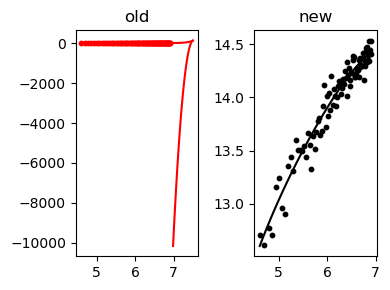

In [9]:
plt.figure()

# old
plt.subplot(121)
plt.title("old")
plt.scatter(energies, np.log(oiso), s=10, color="red", label="old")

npars = 9
nsect = 3
pars, bins = of[f"gI_iso_{n}_pars"].to_numpy()
ib = npars*nsect

for isect in range(nsect):
    #isect = 0
    xb = pars[ib + isect:ib + isect+2]
    p = np.poly1d(np.flip(pars[isect*npars:(isect+1)*npars]))
    esect = np.linspace(*xb, 100)
    plt.plot(esect, p(esect), color="r")

# new
plt.subplot(122)
plt.title("new")
plt.scatter(energies, np.log(iso), s=10, color="k", label="old")

pars, bins = f[f"gI_iso_{n}_pars"].to_numpy()
p = np.poly1d(np.flip(pars[:5]))
esect = np.linspace(pars[5], pars[6], 100)
plt.plot(esect, p(esect), color="k")

plt.tight_layout()

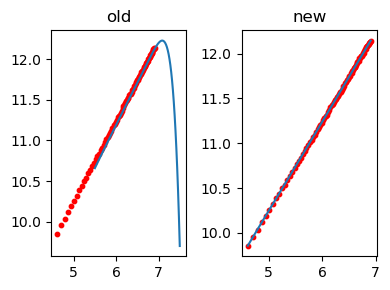

In [10]:
plt.figure()

# old
energies, npho = of["gNphot"].values()
energies = np.log(energies)
npho     = np.log(npho)

plt.subplot(121)
plt.title("old")
plt.scatter(energies, npho, s=10, color=  "red", label="old")

npars = 9
nsect = 3
pars, bins = of["gNphot_pars"].to_numpy()
ib = npars*nsect

isect = 1
xb = pars[ib + isect:ib + isect +2]
p = np.poly1d(np.flip(pars[isect*npars:(isect+1)*npars]))
esect = np.linspace(*xb, 100)
plt.plot(esect, p(esect))

# new
energies, npho = of["gNphot"].values()
energies = np.log(energies)
npho     = np.log(npho)

plt.subplot(122)
plt.title("new")
plt.scatter(energies, npho, s=10, color= "red")

pars, bins = f["gNphot_pars"].to_numpy()
p = np.poly1d(np.flip(pars[:5]))
esect = np.linspace(pars[5], pars[6], 100)
plt.plot(esect, p(esect))

plt.tight_layout()